# SO THIS IS A DATA ANALYTICS WORKFLOW THAT I'M CREATING IN ORDER TO AUTOMATE THE PROCESS OF DATA CLEAN,IMPORTING, MODEL SELECTION, HYPERPARAMENTER TUNING AND PIPELINING

IMPORTING ALL THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer


IMPORTING THE SCIKIT LEARN BECAUSE ITS HEAVENLY

# LETS DEFINE A FUCNTION TO TAKE IN DATA , JUST GIVE INPUT OF THE STRING NAME OF THE FILE IN THE FORMAT data/name_of_the_file.csv


In [2]:
df=pd.read_csv('train.csv')

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Lets see the number of missing values

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# TAKING THE DATA IN AND CLEANING IT

# CLEARLY WE CAN SEE THAT THE COLUMNS OF AGE AND CABIN ARE INCOMPLETE . LETS SEE THIS DATA

In [8]:
df_train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [9]:
df_train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

# A GENEREAL LOOK AT THE TYPE OF NULL VALUES OR TYPE OFUNIQUE VALUES IN A DATASET , SO THAT ANOMALEIS CAN BE IDENTIFIED

In [22]:
for columns in df.columns:
    print(columns)
    print(df[columns].unique())
    print('\n')
    print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

# VISULAIZING MISSING DATA

In [29]:
import missingno as msno

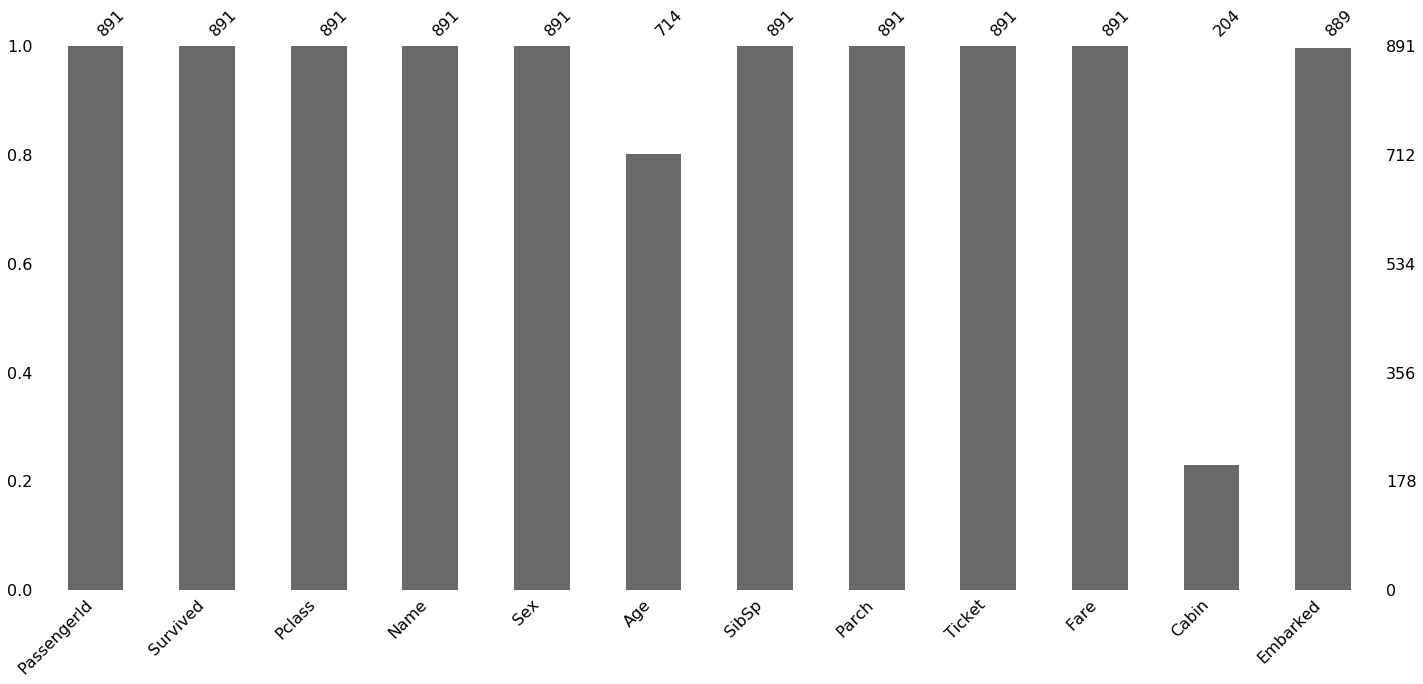

In [30]:
msno.bar(df)

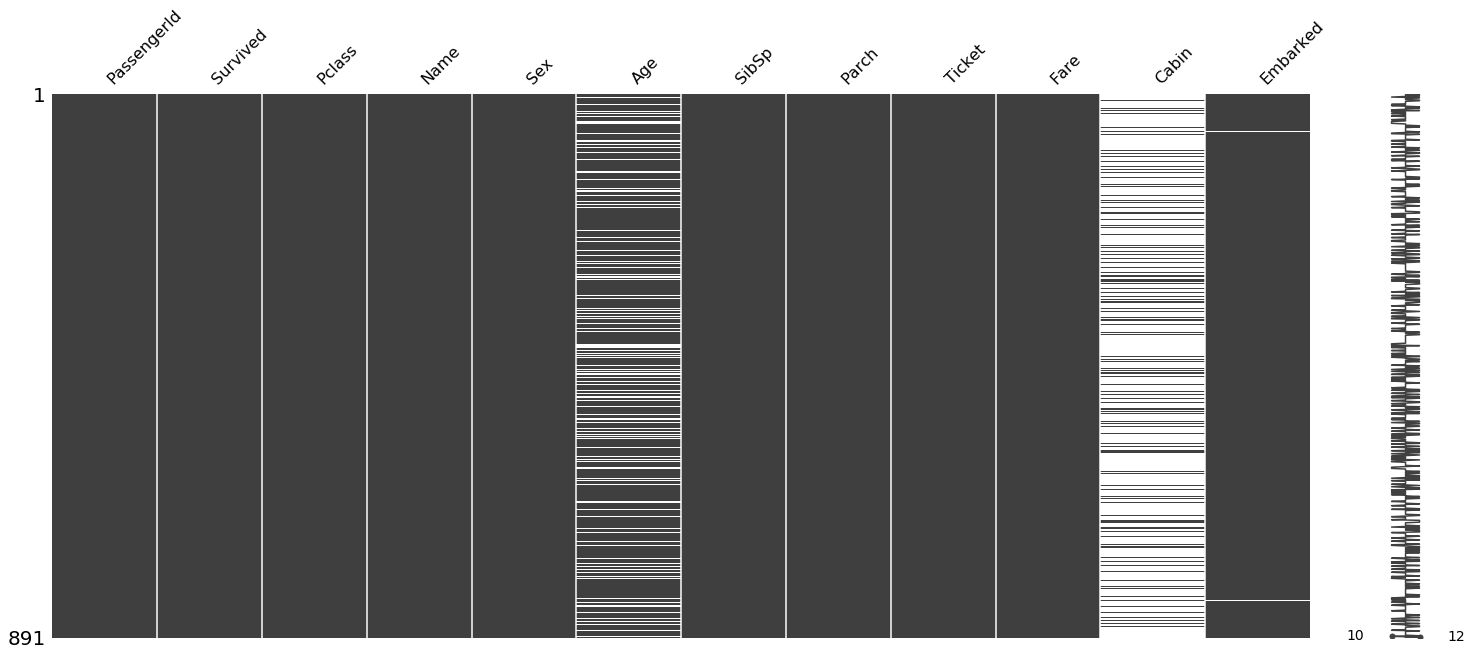

In [31]:
msno.matrix(df)

In [32]:
df_null=df.isna()

In [38]:
missing_value_perc=df_null.mean()*100

In [40]:
print(missing_value_perc)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


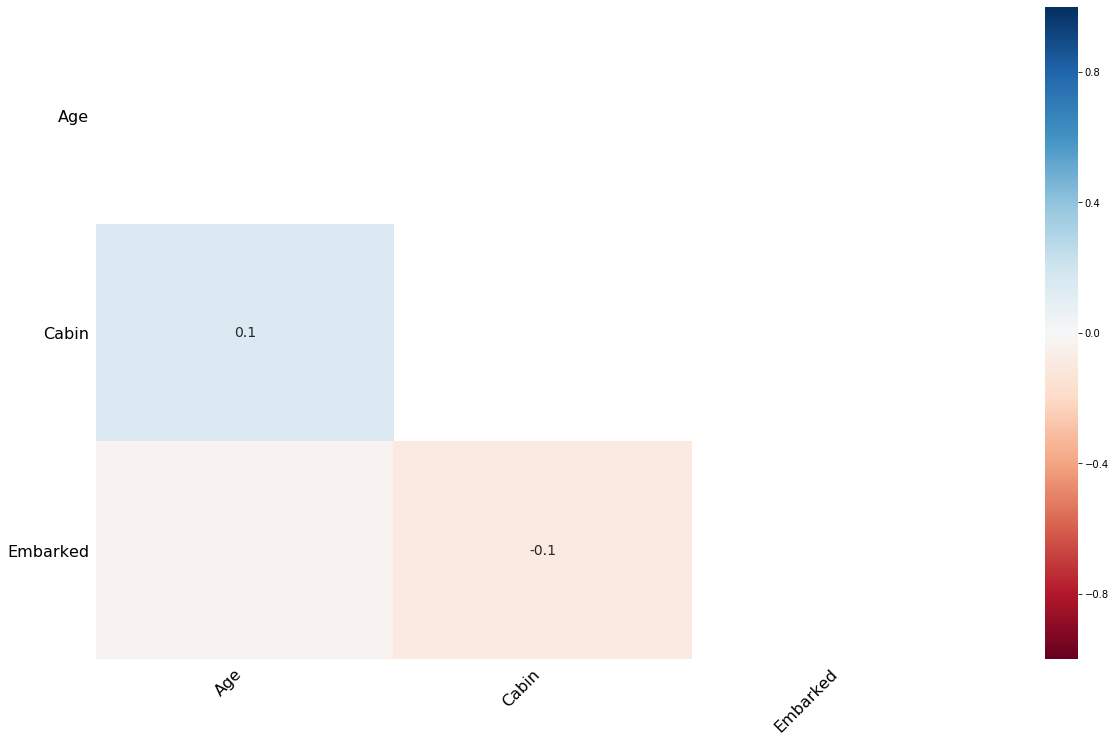

In [63]:
msno.heatmap(df)

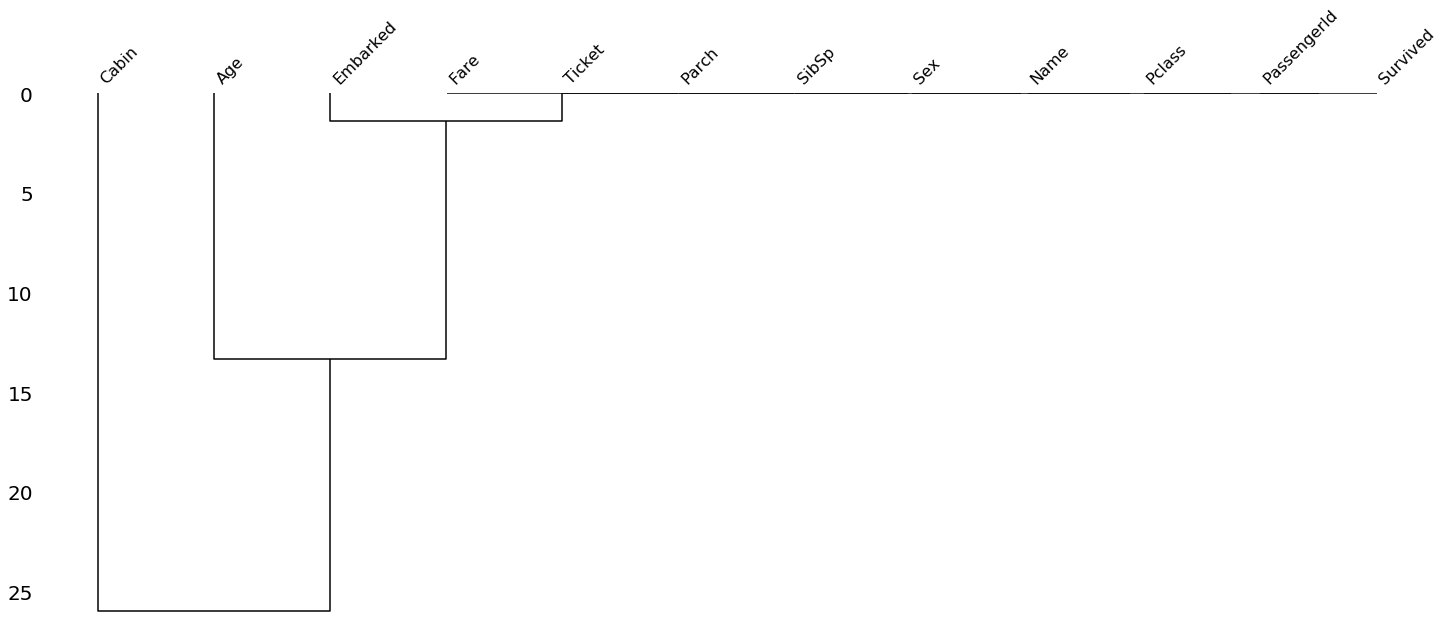

In [64]:
msno.dendrogram(df)

# Checking amount of missingness

# USING FFILL AND BFILL TO FILL DATA

In [45]:
df_null=df.fillna(method='ffill') # fills the previous valid value to np.nan datas

In [46]:
df_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [47]:
df_null=df.fillna(method='bfill') # fills the next valid value to np.nan data

In [48]:
df_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


# USING .interpolate()

In [52]:
df_null=df.interpolate(method='linear')  #other methods include quadratic and nearest

In [53]:
df_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# # Using charts to see if after interpolation produces same distributions

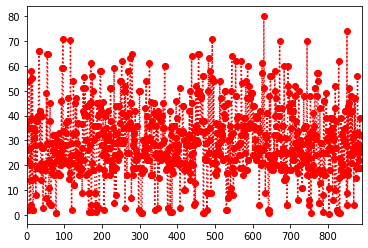

In [61]:
df['Age'].interpolate(method='nearest').plot(color='red',marker='o',linestyle='dotted')

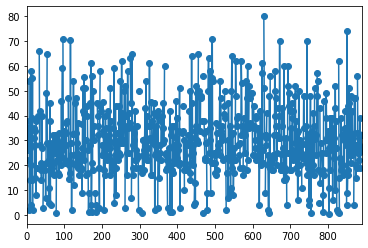

In [62]:
df['Age'].plot(marker='o')

# We will fill the AGE column with mean age coz why not? We will use imputing for this purpose , with strategy ='mean' and missing_values='Nan'

In [23]:
feature=df['Age']#change acc to the column to be corrected

In [24]:
missing_values=np.nan #change according to the null values of the data

In [25]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean') #other strategies= 
feature=feature.to_frame()
feature=imp.fit_transform(feature)
feature=pd.DataFrame(data=feature)


In [26]:
feature.head()

,0
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


# NOW CREATING A FUCNTION TO REPLACE THE OLD COLUMN WITH THE NEW IMPUTED COLUMN 

APPLYING GET_DUMMIES AS WE KNOW THAT THE SCIKIT LEARN API DOESNT WORK GREAT WITH CATEGORICAL DATA

In [14]:
def replacecolumn(df,add):
    remove=input('give the name of the column you want to replace')
    df[remove]=add
    return df
    
    

In [16]:
df_train=replacecolumn(df_train,feature)

give the name of the column you want to replaceAge


In [17]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


# Now getting dummies

In [21]:
def dummies(df):
    feature=''
    feature=input('Which column you want dummies on?')
    dummies=pd.get_dummies(df[feature])
    df=df.drop(feature,axis='columns')
    df=pd.concat([df,dummies],axis=1)
    return df
    
    

In [22]:
df_train=dummies(df_train)

Which column you want dummies on?Sex


In [24]:
df_train=dummies(df_train)

Which column you want dummies on?Pclass


In [25]:
df_train=dummies(df_train)

Which column you want dummies on?Embarked


In [26]:
df_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,1,2,3,C,Q,S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


In [167]:
import seaborn as sns

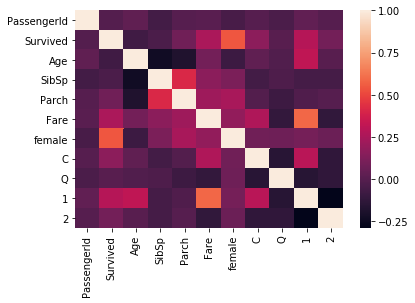

In [168]:
sns.heatmap(df_train.corr())

In [173]:
df_train['Group']=df_Train['Age']

In [174]:
for i in range(len(df_train)):
    if df_train['Age'][i]>50:
        df_train['Group'][i]=5
    elif df_train['Age'][i]>40 and df_train['Age'][i]<50:
        df_train['Group'][i]=4
    elif df_train['Age'][i]>20 and df_train['Age'][i]<40:
        df_train['Group'][i]=3
    elif df_train['Age'][i]>13 and df_train['Age'][i]<20:
        df_train['Group'][i]=2
    else:
        df_train['Group'][i]=1

In [175]:
df_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,C,Q,1,2,Group
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0,3.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1,0,3.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,0,3.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,3.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,0,0,3.0


In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


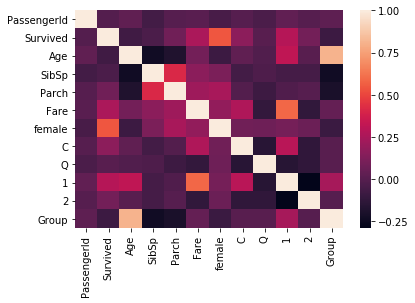

In [178]:
sns.heatmap(df_train.corr())

In [180]:
df_train=df_train.drop(columns='Group')

In [181]:
df_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,C,Q,1,2
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,0,0


In [182]:
X_train=df_train.drop(columns='Survived')

In [183]:
y_train=df_train['Survived']

In [184]:
X_train.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,C,Q,1,2
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,0,0


In [187]:
y_train=y_train.to_frame()

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn=KNeighborsClassifier(n_neighbors=10)

In [196]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [192]:
X_train=X_train.drop(columns='Name')

In [195]:
X_train=X_train.drop(columns=['Ticket','Cabin'])

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=10)

In [202]:
knn.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [203]:
knn.score(X_train,y_train)

0.6853932584269663

In [206]:
knn.score(X_test,y_test)

0.8044692737430168

In [207]:
from sklearn.model_selection import cross_val_score

In [210]:
cv_results=cross_val_score(knn,X_test,y_test,cv=5)

In [211]:
np.mean(cv_results)

0.7093436293436295